In [1]:
import numpy as np
from historymatch import plot
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib.patches import Rectangle
import importlib

# import internal files
from historymatch import emulators
from historymatch import sample
from historymatch import historymatch
from historymatch import plot
from historymatch import utils



In [45]:
SMALL_SIZE = 30
MEDIUM_SIZE = 32
BIGGER_SIZE = 26



plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

rc('font',**{'family':'serif'})
rc('text', usetex=True)

In [3]:
# load gaussian results, emulator

NI_3D_1 = np.loadtxt('data/em/6D_HM_w0_ellipsoid_nonimp.txt')
NI_3D_2 = np.loadtxt('data/em/6D_HM_w1_ellipsoid_nonimp.txt')
NI_3D_3 = np.loadtxt('data/em/6D_HM_w2_ellipsoid_nonimp.txt')
NI_3D_4 = np.loadtxt('data/em/6D_HM_w3_ellipsoid_nonimp.txt')
NI_3D_5 = np.loadtxt('data/em/6D_HM_w4_ellipsoid_nonimp.txt')




S_3D_1 = np.loadtxt('data/em/6D_HM_w0_ellipsoid_samples.txt')
S_3D_2 = np.loadtxt('data/em/6D_HM_w1_ellipsoid_samples.txt')

#S_3D_3 = np.loadtxt('data/5D_HM_w2_ellipsoid_samples.txt')

In [4]:
# load gaussian results, no emulator
NI_3D_1_noem = np.loadtxt('data/noem/6D_HM_w0_ellipsoid_nonimp_noem.txt')
NI_3D_2_noem = np.loadtxt('data/noem/6D_HM_w1_ellipsoid_nonimp_noem.txt')
NI_3D_3_noem = np.loadtxt('data/noem/6D_HM_w2_ellipsoid_nonimp_noem.txt')
NI_3D_4_noem = np.loadtxt('data/noem/6D_HM_w3_ellipsoid_nonimp_noem.txt')
NI_3D_5_noem = np.loadtxt('data/noem/6D_HM_w4_ellipsoid_nonimp_noem.txt')

In [5]:

NI_3D_1_HC_noem = np.loadtxt('data/noem/6D_HM_w0_hypercube_nonimp.txt')
NI_3D_2_HC_noem = np.loadtxt('data/noem/6D_HM_w1_hypercube_nonimp.txt')
NI_3D_3_HC_noem = np.loadtxt('data/noem/6D_HM_w2_hypercube_nonimp.txt')
NI_3D_4_HC_noem = np.loadtxt('data/noem/6D_HM_w3_hypercube_nonimp.txt')

In [6]:
S_1_EL = np.loadtxt('data/em/6D_HM_w0_ellipsoid_samples.txt')
S_2_EL = np.loadtxt('data/em/6D_HM_w1_ellipsoid_samples.txt')
S_3_EL = np.loadtxt('data/em/6D_HM_w2_ellipsoid_samples.txt')
S_4_EL = np.loadtxt('data/em/6D_HM_w3_ellipsoid_samples.txt')
S_5_EL = np.loadtxt('data/em/6D_HM_w4_ellipsoid_samples.txt')

S_3D_5_HC_noem = np.loadtxt('data/noem/6D_HM_w3_hypercube_samples.txt')

In [7]:
#NIHC_3D_1 = np.loadtxt('data/6D_HM_w0_hypercube_nonimp.txt')
#NIHC_3D_2 = np.loadtxt('data/6D_HM_w1_hypercube_nonimp.txt')
#NI_3D_3 = np.loadtxt('data/5D_HM_w2_ellipsoid_nonimp.txt')

In [8]:

NI = [NI_3D_1, NI_3D_2, NI_3D_3, NI_3D_4, NI_3D_5]
NIHC_noem = [NI_3D_1_HC_noem, NI_3D_2_HC_noem, NI_3D_3_HC_noem, NI_3D_4_HC_noem]
S_EL = [S_1_EL, S_2_EL, S_3_EL, S_4_EL, S_5_EL]


[array([[ 6.38049500e+00, -1.89179250e-01,  4.18612500e-01, ...,
         2.00778750e-01,  5.57212500e-02,  6.10874272e+01],
       [ 5.41446500e+00, -1.61577750e-01,  3.19367500e-01, ...,
         2.76197250e-01,  2.21663250e-01,  6.18315648e+01],
       [ 5.76582500e+00, -9.90067500e-02,  8.72052500e-01, ...,
         1.20599250e-01,  1.48398750e-01,  4.05113997e+01],
       ...,
       [ 6.93387500e+00, -1.90674750e-01,  7.75787500e-01, ...,
         9.06142500e-02,  1.05275250e-01,  8.78145216e+00],
       [ 5.86136500e+00, -4.39162500e-02,  4.28472500e-01, ...,
         2.46452250e-01,  1.12262250e-01,  2.23825238e+01],
       [ 5.38124500e+00, -2.70501750e-01,  3.17317500e-01, ...,
         3.73282500e-02,  2.70932250e-01,  1.10193512e+02]]), array([[ 6.25512342, -0.04720255,  0.28181197, ...,  0.17561039,
         0.09348056, 18.21246877],
       [ 5.77323442, -0.12099578,  0.68247645, ...,  0.04492772,
         0.206188  ,  5.71327861],
       [ 5.40056659, -0.07074536,  0.4528

In [9]:
print(NI_3D_2.shape)

(51587, 7)


In [10]:
ndim = 6
nwaves = 5
volshape = 'ellipsoid'

In [28]:

#a0_lim = np.array([7,8.5]).reshape(1,-1)
#a1_lim = np.array([-0.05, -0.015]).reshape(1,-1)
#a2_lim = np.array([0, 0.4]).reshape(1,-1)

#a_limits = np.concatenate((a0_lim, a1_lim, \
                            #a2_lim), axis=0)

a0_lim = np.array([6,8]).reshape(1,-1)
a1_lim = np.array([-0.3, -0.1]).reshape(1,-1)
a2_lim = np.array([1, 0]).reshape(1,-1)
a3_lim = np.array([0, 0.01]).reshape(1,-1)
a4_lim = np.array([0, 0.3]).reshape(1,-1)
a5_lim = np.array([0, 0.3]).reshape(1,-1)
a4_lim = np.array([0, 0.3]).reshape(1,-1)

#[ 6.33874297e+00 -1.21996118e-01  5.72952311e-01  4.72034789e-03 1.55756844e-01]

a_limits = np.concatenate((a0_lim, a1_lim, \
                            a2_lim, a3_lim, a4_lim, a5_lim), axis=0)

theta_0_bound = np.array([4, 8]).reshape(1,-1)
theta_1_bound = np.array([-0.4, 0]).reshape(1,-1)
theta_2_bound = np.array([0.35, 0.85]).reshape(1,-1)
theta_3_bound = np.array([-0.005, 0.015]).reshape(1,-1) # keep
theta_4_bound = np.array([-0.1, 0.4]).reshape(1,-1)
theta_5_bound = np.array([-0.1, 0.5]).reshape(1,-1)


parameter_bounds = np.concatenate((theta_0_bound, theta_1_bound, \
                                   theta_2_bound, theta_3_bound, theta_4_bound, theta_5_bound), axis=0)

theta_0_vals = np.linspace(parameter_bounds[0,0], parameter_bounds[0,1], 100)
theta_1_vals = np.linspace(parameter_bounds[1,0], parameter_bounds[1,1], 100)
theta_2_vals = np.linspace(parameter_bounds[2,0], parameter_bounds[2,1], 100)
theta_3_vals = np.linspace(parameter_bounds[3,0], parameter_bounds[3,1], 100)
theta_4_vals = np.linspace(parameter_bounds[4,0], parameter_bounds[4,1], 100)
theta_5_vals = np.linspace(parameter_bounds[5,0], parameter_bounds[5,1], 100)



theta_vals = np.concatenate((theta_0_vals.reshape(1,-1), theta_1_vals.reshape(1,-1), \
                             theta_2_vals.reshape(1,-1),theta_3_vals.reshape(1,-1),\
                            theta_4_vals.reshape(1,-1),theta_5_vals.reshape(1,-1)), axis=0)


initial_volume = 1
for i in range(ndim):
    initial_volume *= np.abs(parameter_bounds[i,1] - parameter_bounds[i,0])
    
print(initial_volume)

0.0048


In [12]:
analytic_mean = np.loadtxt("data/6D_analytic_mean.txt").reshape(ndim,)
analytic_cov = np.loadtxt("data/6D_analytic_cov.txt").reshape(ndim,ndim)

#print(analytic_cov)

In [13]:
a0lim = np.array([np.min(S_3D_1[:,0]),np.max(S_3D_1[:,0])]).reshape(1,-1)
a1lim = np.array([np.min(S_3D_1[:,1]),np.max(S_3D_1[:,1])]).reshape(1,-1)
a2lim = np.array([np.min(S_3D_1[:,2]),np.max(S_3D_1[:,2])]).reshape(1,-1)
a3lim = np.array([np.min(S_3D_1[:,3]),np.max(S_3D_1[:,3])]).reshape(1,-1)
a4lim = np.array([np.min(S_3D_1[:,4]),np.max(S_3D_1[:,4])]).reshape(1,-1)

lims = np.concatenate((a0lim, a1lim, \
                            a2lim, a3lim, a4lim), axis=0)

[-0.00870267  0.01770717]


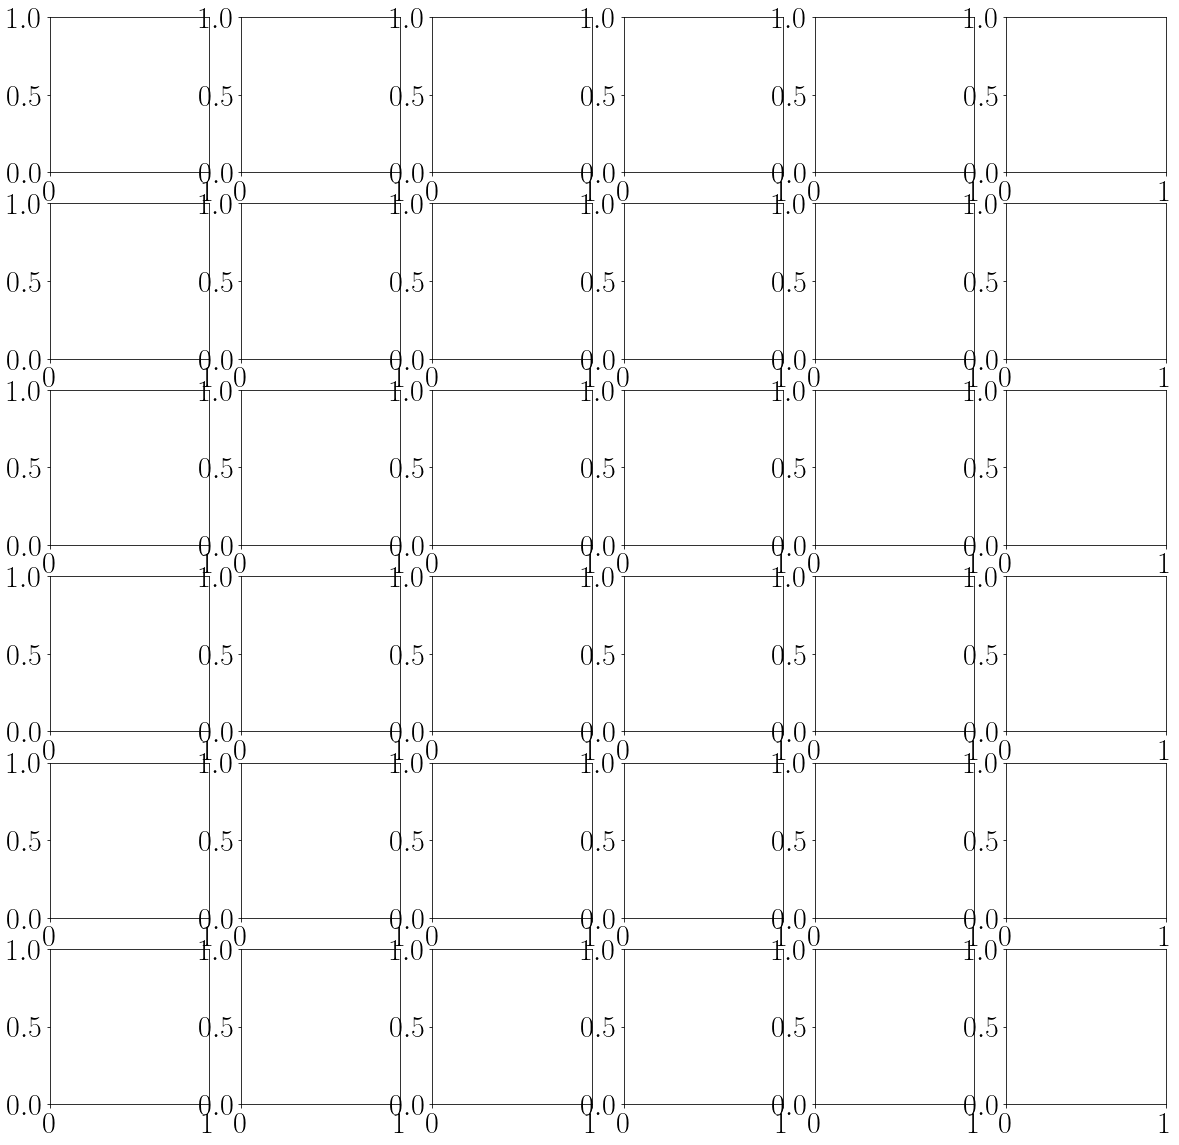

In [22]:
importlib.reload(plot)

fig, axes = plt.subplots(ndim,ndim,figsize=(20,20))

a0lim = np.array([np.min(S_EL[1][:,0]),np.max(S_EL[1][:,0])]).reshape(1,-1)
a1lim = np.array([np.min(S_EL[1][:,1]),np.max(S_EL[1][:,1])]).reshape(1,-1)
a2lim = np.array([np.min(S_EL[1][:,2]),np.max(S_EL[1][:,2])]).reshape(1,-1)
a3lim = np.array([np.min(S_EL[1][:,3]),np.max(S_EL[1][:,3])]).reshape(1,-1)
a4lim = np.array([np.min(S_EL[1][:,4]),np.max(S_EL[1][:,4])]).reshape(1,-1)
a5lim = np.array([np.min(S_EL[1][:,5]),np.max(S_EL[1][:,5])]).reshape(1,-1)

lims = np.concatenate((a0lim, a1lim, \
                            a2lim, a3lim, a4lim, a5lim), axis=0)

print(lims[3])
#plot.plotcorner(S_3D_5, lims, ndim, bins=30, Fig=(fig,axes))

#for i in range(ndim):
    #for j in range(ndim):
        #ax = axes[j,i]
        #if i < j:
            #true_cov = np.array([[analytic_cov[i,i], analytic_cov[i,j]],[analytic_cov[j,i], analytic_cov[j,j]]])
            #plot.get_cov_ellipse(true_cov, [analytic_mean[i],analytic_mean[j]], 3, 12.592, ax, 'red')

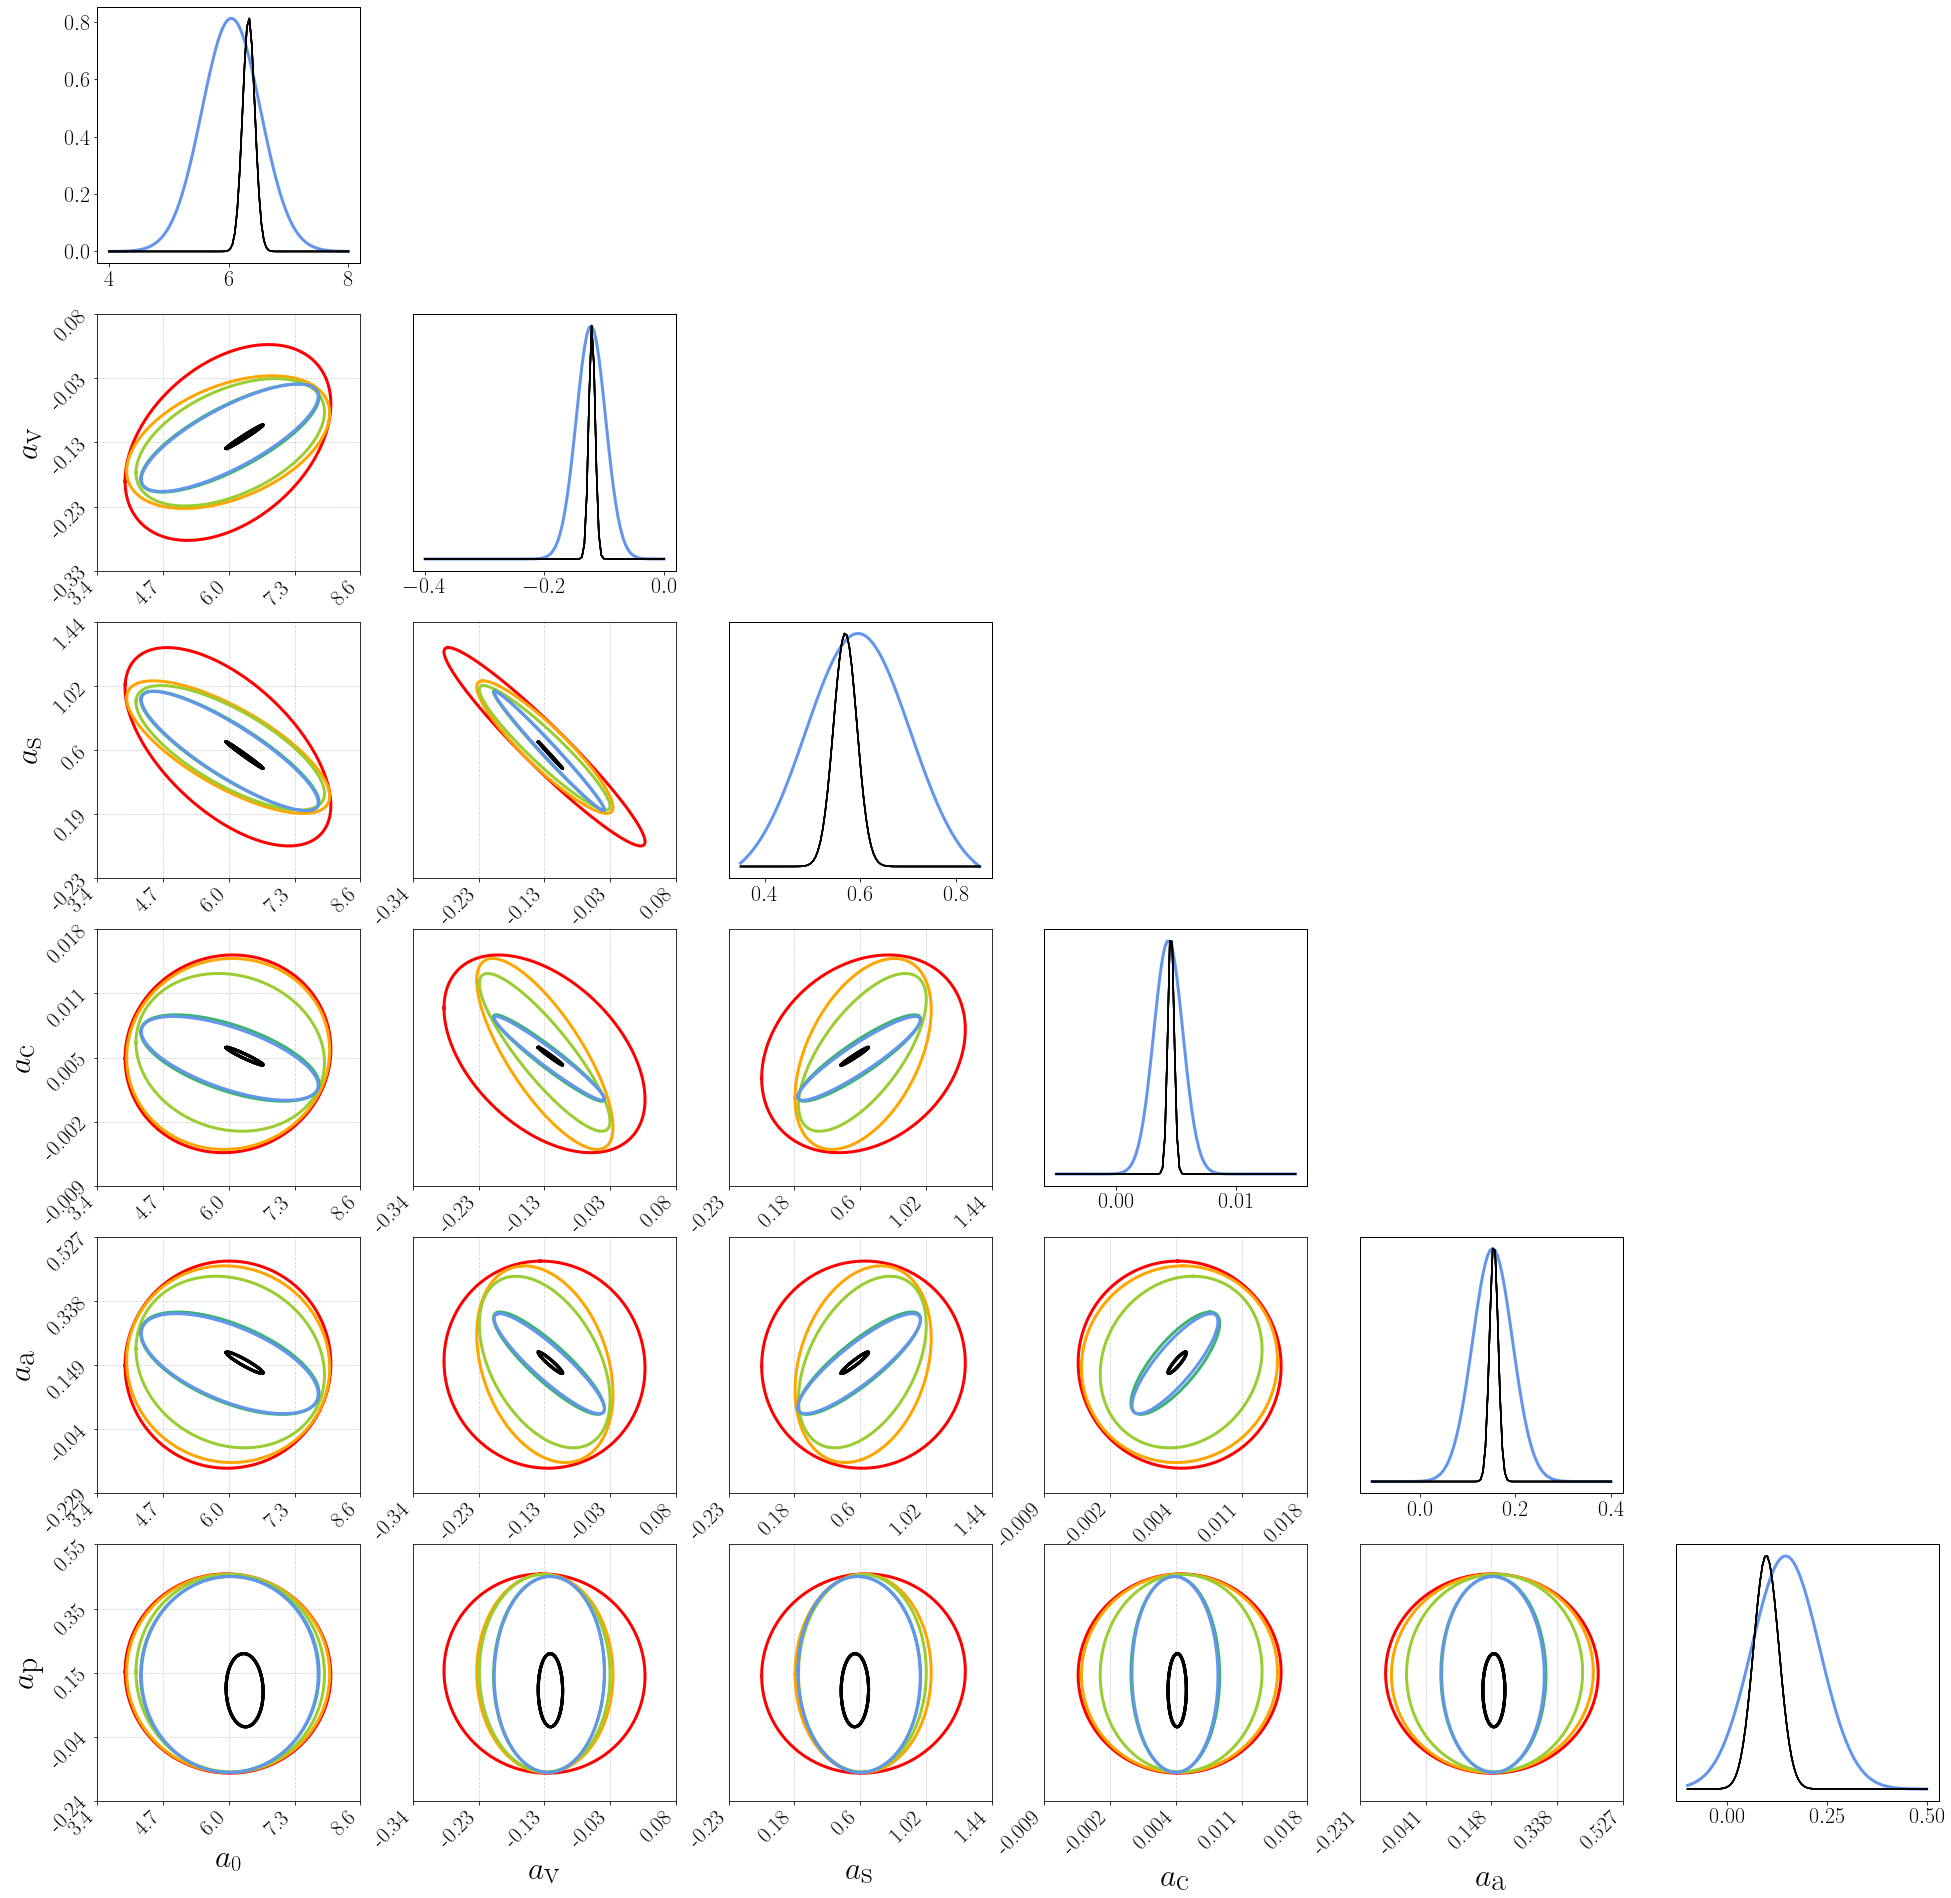

In [50]:
colors = ['red', 'orange', 'yellowgreen', 'mediumseagreen', 'cornflowerblue', 'mediumpurple', 'plum', 'lightpink', ]
theta_names = [r'$a_{0}$', r'$a_{\textrm{v}}$', r'$a_{\textrm{s}}$', r'$a_{\textrm{c}}$', r'$a_{\textrm{a}}$', r'$a_{\textrm{p}}$']
dec_list = [1,2,2,3,3,2]

#sample_bounds = utils.locate_boundaries(results.samples[-1], ndim)

fig, axes = plt.subplots(ndim, ndim, figsize=(33,33))

if volshape == 'ellipsoid':
    for k in range(nwaves):
        
        nonimplausible = np.zeros_like(NI[k])
        for dim in range(ndim):
            nonimplausible[:,dim] = NI[k][:,dim]
        mean = np.mean(nonimplausible[:,:-1].T, axis=1)
        cov = np.cov(nonimplausible[:,:-1].T)
        
        for i in range(ndim):
            for j in range(ndim):
                ax = axes[j,i]
                if i != 0:
                    ax.axes.yaxis.set_visible(False)
                if i < j:
                    ax.grid(b=True, which='major', color='lightgrey', linestyle='--')
                    true_cov = np.array([[analytic_cov[i,i], analytic_cov[i,j]],[analytic_cov[j,i], analytic_cov[j,j]]])
                    cov_matrix = np.array([[cov[i,i], cov[i,j]],[cov[j,i], cov[j,j]]])
                    plot.get_cov_ellipse(cov_matrix, [mean[i],mean[j]], 3, 12.592, ax, colors[k])
                    plot.get_cov_ellipse(true_cov, [analytic_mean[i],analytic_mean[j]], 3, 12.592, ax, 'black')
                    
                    ax.set_xlabel(theta_names[i])
                    ax.set_ylabel(theta_names[j])
                    #ax.set_xlim([lims[i,0], lims[i,1]])
                    #ax.set_ylim([lims[j,0], lims[j,1]])

                    ax.set_xticks(np.linspace(lims[i,0]*1.01, lims[i,1], 5))
                    ax.set_xticklabels(np.around(np.linspace(lims[i,0]*1.01, lims[i,1], 5),dec_list[i]), rotation = 45, ha="right")
                    ax.set_yticks(np.linspace(lims[j,0]*1.01, lims[j,1], 5))
                    ax.set_yticklabels(np.around(np.linspace(lims[j,0], lims[j,1], 5),dec_list[j]), rotation = 45, ha="right")

                elif i == j:
                    
                    ax_right = ax.twinx()
                    if k == 4:
                        ax.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], mean[i], np.sqrt(cov[i,i])), color='cornflowerblue',linewidth=3)
                    ax_right.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], analytic_mean[i], np.sqrt(analytic_cov[i,i])), color='black')
                    ax_right.axes.yaxis.set_visible(False)
                    #ax.set_xlim([sample_bounds[i][0],sample_bounds[i][1]])
                    #ax.set_title(str(theta_names[i]) + '=' + str(round(theta_best[i], 2)), fontsize=14)
                else:
                    ax.axis('off')
elif volshape == 'hypercube':
    for k in range(nwaves):
        
        nonimplausible = utils.locate_boundaries(NIHC[k], ndim)
        for i in range(ndim):
            for j in range(ndim):
                ax = axes[j,i]
                if i < j:
                    true_cov = np.array([[analytic_cov[i,i], analytic_cov[i,j]],[analytic_cov[j,i], analytic_cov[j,j]]])
                    cov_matrix = np.array([[cov[i,i], cov[i,j]],[cov[j,i], cov[j,j]]])
                    plot.get_cov_ellipse(true_cov, [analytic_mean[i],analytic_mean[j]], 3, 5.991, ax, 'black')
                    #true_cov = np.array([[analytic_cov[i,i], analytic_cov[i,j]],[analytic_cov[j,i], analytic_cov[j,j]]])
                    ax.add_patch(Rectangle((nonimplausible[i,0], nonimplausible[j,0]),\
                                           (nonimplausible[i,1]-nonimplausible[i,0]), \
                                           (nonimplausible[j,1]-nonimplausible[j,0]),\
                        color=colors[k],alpha=0.7,label='Nonimp. Hypercube'))
                    #plot.get_cov_ellipse(true_cov, [analytic_mean[i],analytic_mean[j]], 3, 5.991, ax, 'black')
                    #ax.set_xlim([a_limits[i][0],a_limits[i][1]])
                    #ax.set_ylim([a_limits[j][0],a_limits[j][1]])
                    ax.set_xlabel(theta_names[i])
                    ax.set_ylabel(theta_names[j])
                else:
                    ax.axis('off')

#plt.savefig('figures/GA_all.png', bbox_inches='tight', facecolor='white', transparent=False)

In [15]:
mean_EL_noem = np.mean(NI_3D_5_noem[:,:-1].T, axis=1)
cov_EL_noem = np.cov(NI_3D_5_noem[:,:-1].T)

mean_EL = np.mean(NI_3D_5[:,:-1].T, axis=1)
cov_EL = np.cov(NI_3D_5[:,:-1].T)

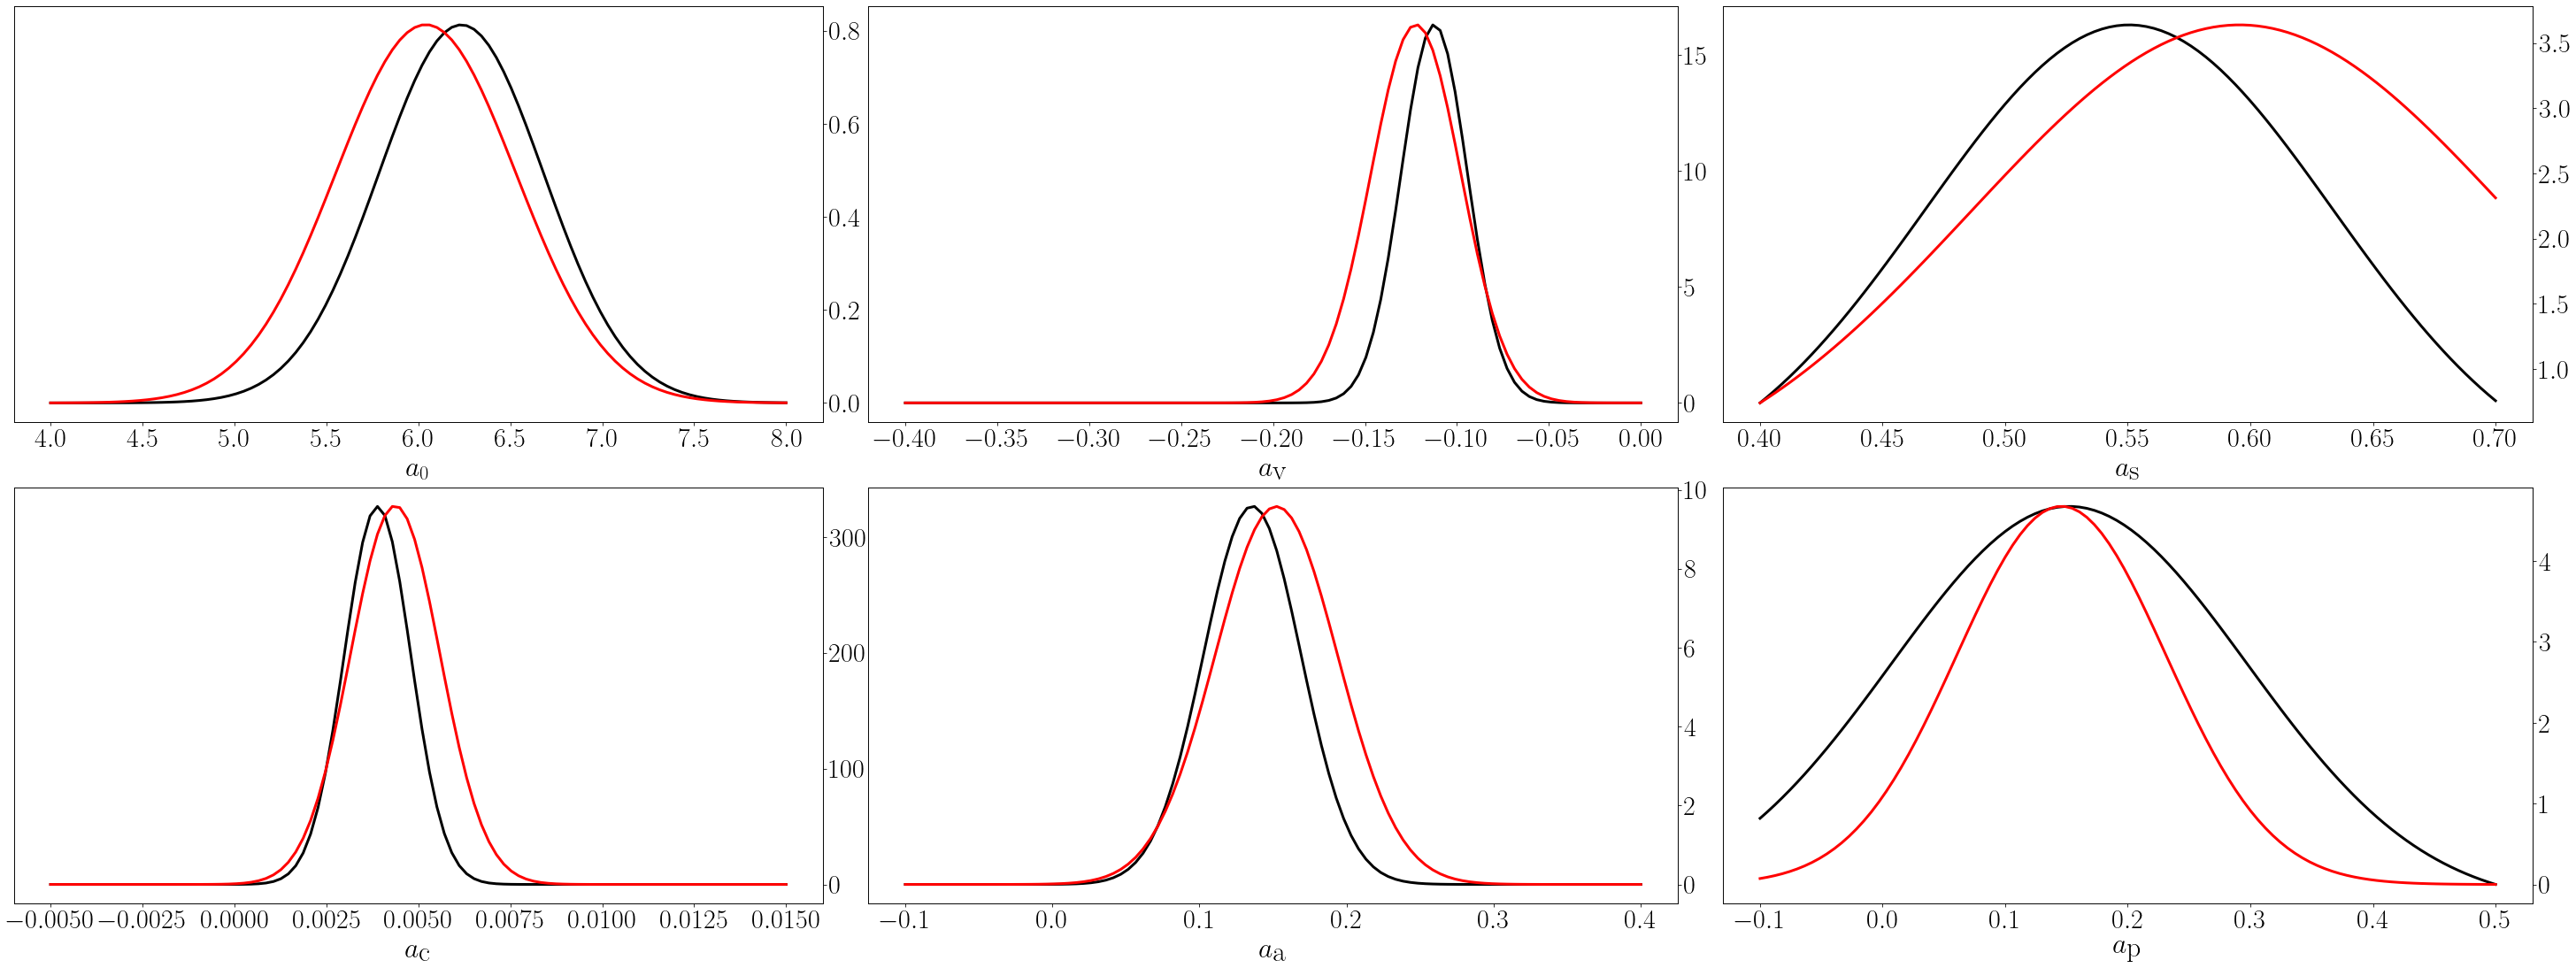

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(40,15))

for i in range(ndim):
    if i < 3:
        j = 0
        k = i
    else:
        j = 1
        k = i - 3
        
    
    axes[j,k].plot(theta_vals[i], stats.norm.pdf(theta_vals[i], mean_EL_noem[i], np.sqrt(cov_EL_noem[i,i])), color='black', linewidth=3)
    
    ax_right = axes[j,k].twinx()
    ax_right.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], mean_EL[i], np.sqrt(cov_EL[i,i])), color='red', linewidth=3)
    #axes[j,k].axvline(nonimplausible_HC[i,0], color='red', linewidth=3, label = r'Hypercube Bounds'.format(95))
    #axes[j,k].axvline(nonimplausible_HC[i,1], color='red', linewidth=3)
    
    
    # plot 95% gaussian
    #axes[j,k].axvline(mean_EL[i]-((2)*np.sqrt(cov_EL[i,i])), color='royalblue', linewidth=3, linestyle='--', label = r'Gaussian {}% Confidence'.format(95))
    #axes[j,k].axvline(mean_EL[i]+((2)*np.sqrt(cov_EL[i,i])), color='royalblue', linewidth=3, linestyle='--')
    
    #confidence_interval = stats.norm.interval(alpha=0.95, loc=mean_EL[i], scale=np.sqrt(cov_EL[i,i]))
    #axes[j,k].axvline(confidence_interval[0], color='royalblue', linewidth=3, linestyle='--', label = r'Gaussian 95\% CI')
    #axes[j,k].axvline(confidence_interval[1], color='royalblue', linewidth=3, linestyle='--')
    
    axes[j,k].axes.get_yaxis().set_visible(False)
    axes[j,k].set_xlabel(theta_names[i])
    
#axes[0,1].legend(loc='best')
plt.tight_layout(pad=0.0)

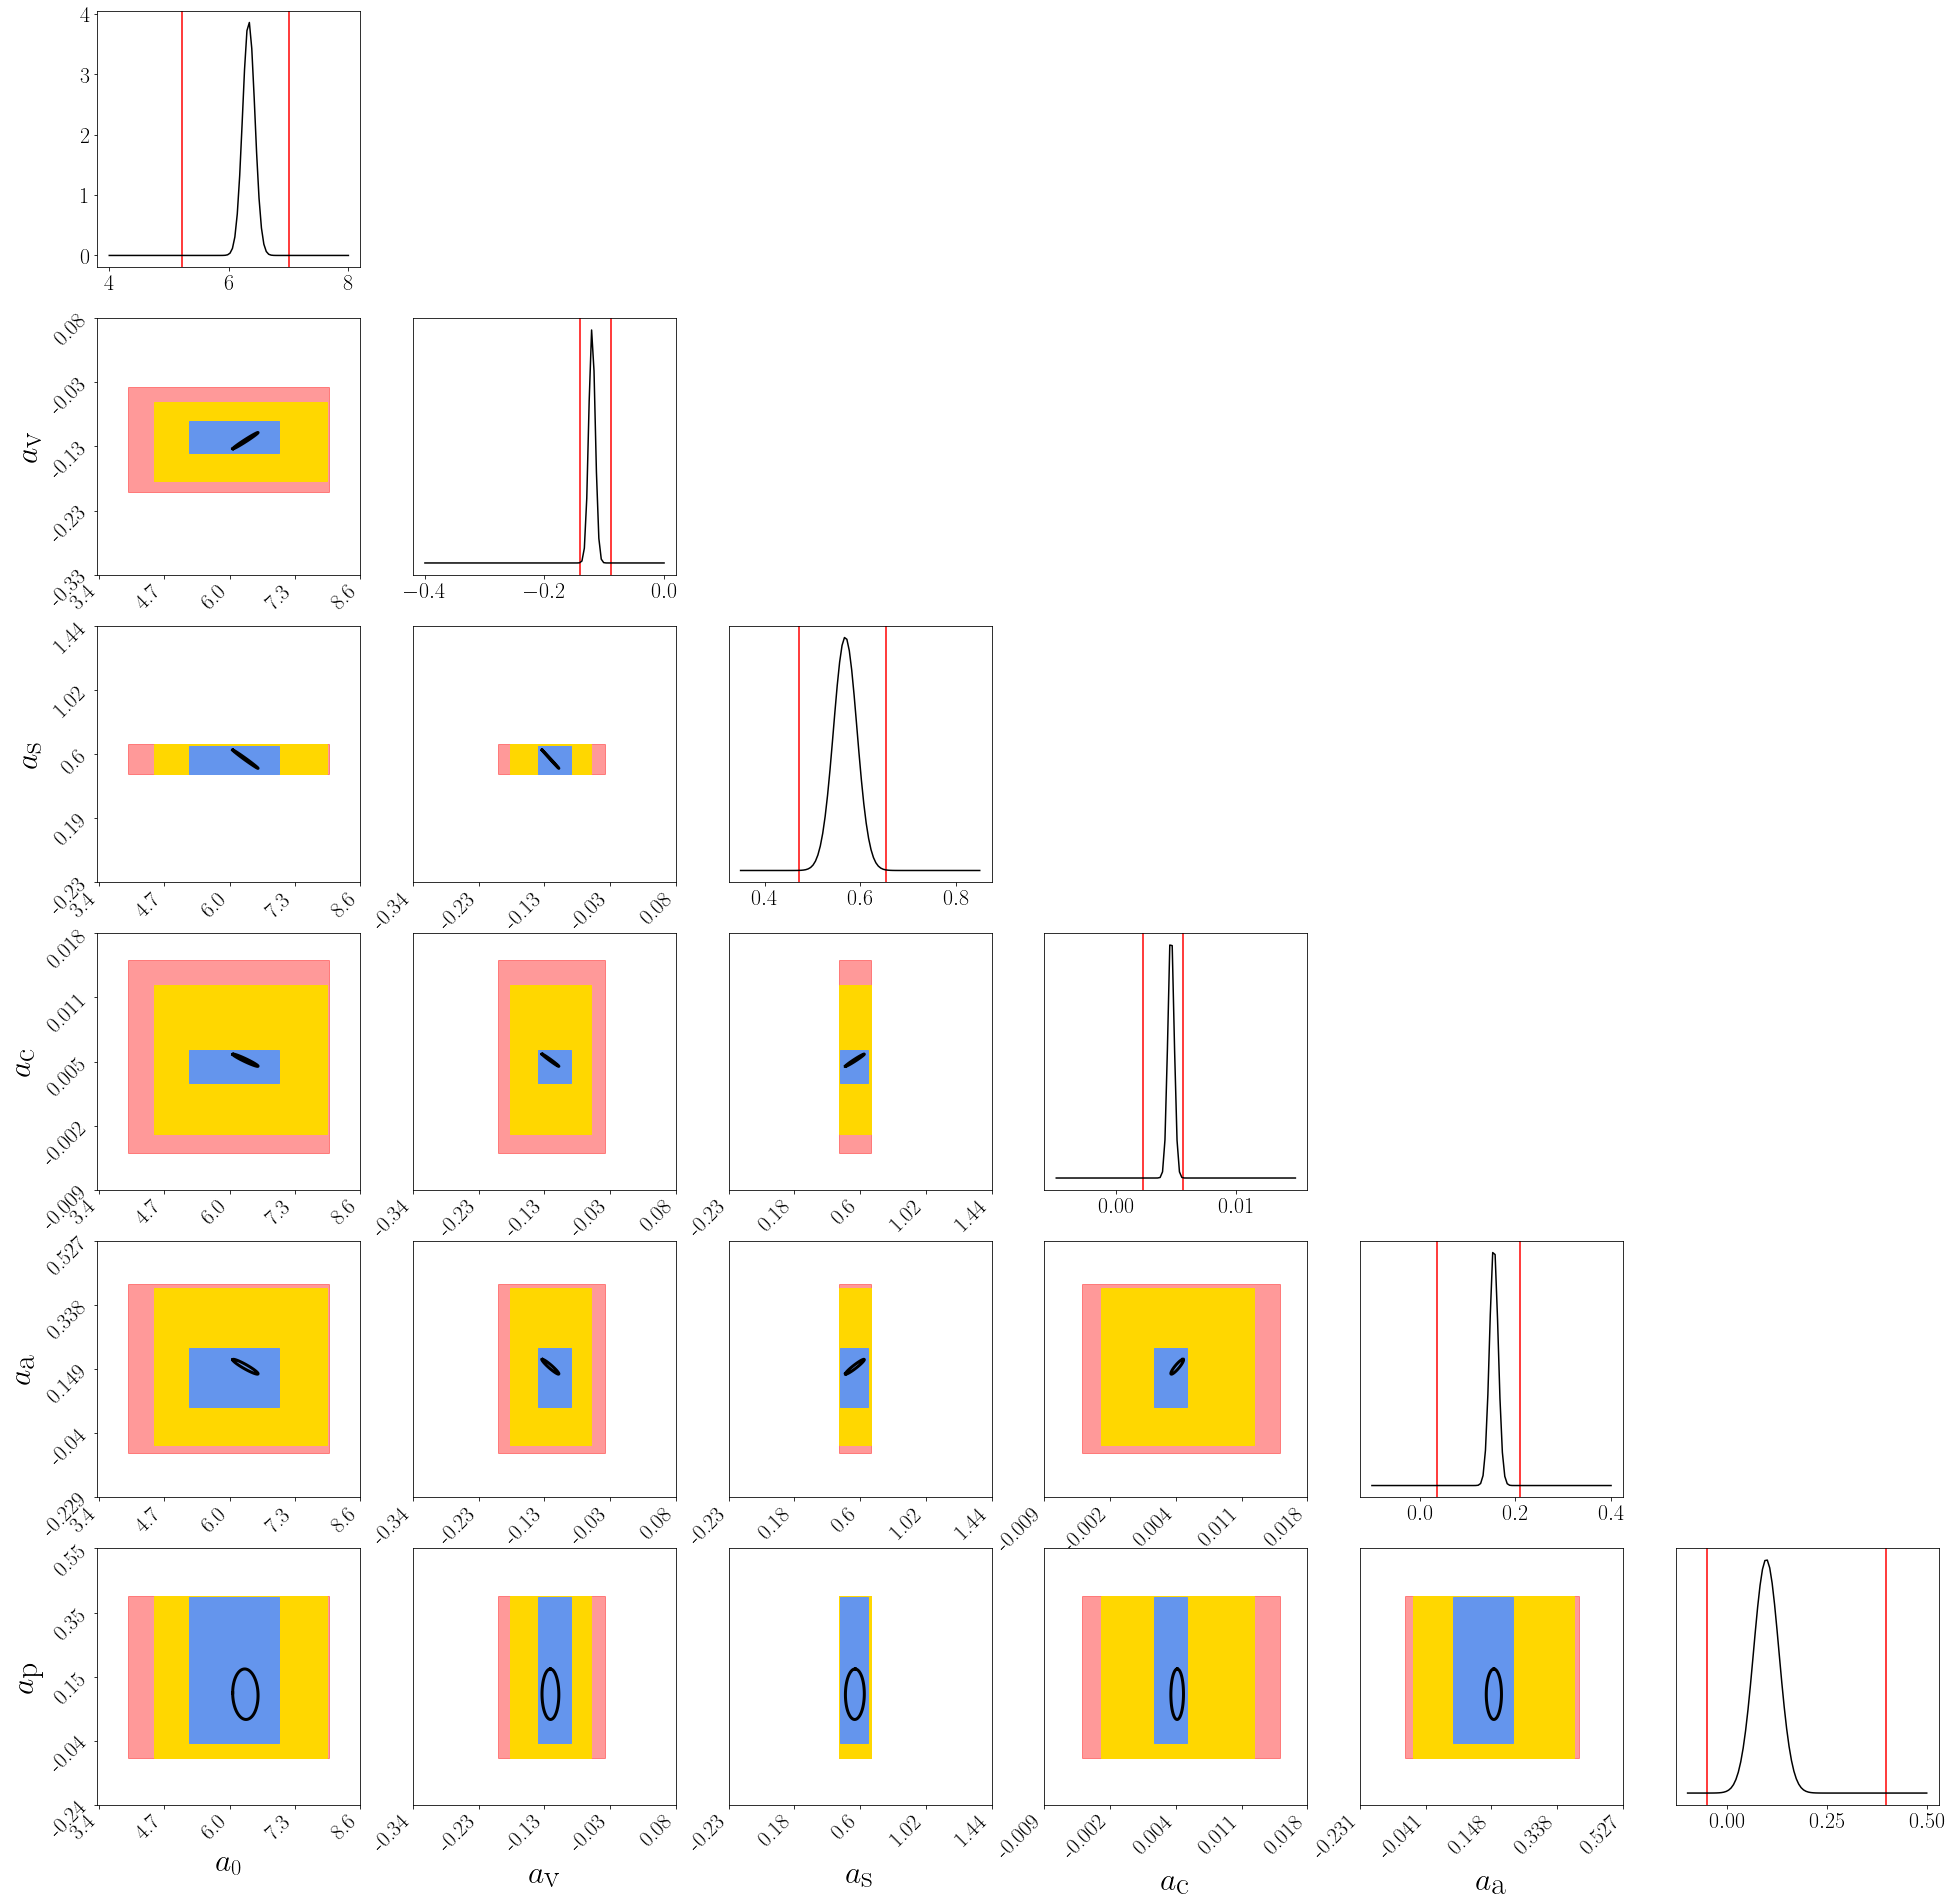

In [57]:
fig, axes = plt.subplots(ndim, ndim, figsize=(33,33))

nonimplausible_HC = utils.locate_boundaries(NI_3D_4_HC_noem, ndim)
nonimplausible_HC_w3 = utils.locate_boundaries(NI_3D_3_HC_noem, ndim)
nonimplausible_HC_w2 = utils.locate_boundaries(NI_3D_2_HC_noem, ndim)
nonimplausible_HC_w1 = utils.locate_boundaries(NI_3D_1_HC_noem, ndim)

mean_EL = np.mean(NI_3D_4[:,:-1].T, axis=1)
cov_EL = np.cov(NI_3D_4[:,:-1].T)
    
for i in range(ndim):
    for j in range(ndim):
        ax = axes[j,i]
        if i != 0:
            ax.axes.yaxis.set_visible(False)
        if i < j:
            
            cov_matrix = np.array([[cov_EL[i,i], cov_EL[i,j]],[cov_EL[j,i], cov_EL[j,j]]])
            #plot.get_cov_ellipse(cov_matrix, [mean_EL[i],mean_EL[j]], 3, 12.592, ax, colors[3])
        
        
            true_cov = np.array([[analytic_cov[i,i], analytic_cov[i,j]],[analytic_cov[j,i], analytic_cov[j,j]]])
            cov_matrix = np.array([[cov[i,i], cov[i,j]],[cov[j,i], cov[j,j]]])
            plot.get_cov_ellipse(true_cov, [analytic_mean[i],analytic_mean[j]], 3, 5.991, ax, 'black')
            
            ax.add_patch(Rectangle((nonimplausible_HC_w1[i,0], nonimplausible_HC_w1[j,0]),\
                                    (nonimplausible_HC_w1[i,1]-nonimplausible_HC_w1[i,0]), \
                                    (nonimplausible_HC_w1[j,1]-nonimplausible_HC_w1[j,0]),\
                        color=colors[0],alpha=0.4,label='Nonimp. Hypercube'))
            #ax.add_patch(Rectangle((nonimplausible_HC_w2[i,0], nonimplausible_HC_w2[j,0]),\
                                    #(nonimplausible_HC_w2[i,1]-nonimplausible_HC_w2[i,0]), \
                                    #(nonimplausible_HC_w2[j,1]-nonimplausible_HC_w2[j,0]),\
                        #color=colors[1],alpha=1,label='Nonimp. Hypercube'))
            ax.add_patch(Rectangle((nonimplausible_HC_w3[i,0], nonimplausible_HC_w3[j,0]),\
                                    (nonimplausible_HC_w3[i,1]-nonimplausible_HC_w3[i,0]), \
                                    (nonimplausible_HC_w3[j,1]-nonimplausible_HC_w3[j,0]),\
                        color='gold',alpha=1,label='Nonimp. Hypercube'))
            
            ax.add_patch(Rectangle((nonimplausible_HC[i,0], nonimplausible_HC[j,0]),\
                                    (nonimplausible_HC[i,1]-nonimplausible_HC[i,0]), \
                                    (nonimplausible_HC[j,1]-nonimplausible_HC[j,0]),\
                        color=colors[4],alpha=1,label='Nonimp. Hypercube'))
            
            
            
                    #plot.get_cov_ellipse(true_cov, [analytic_mean[i],analytic_m
                    #plot.get_cov_ellipse(true_cov, [analytic_mean[i],analytic_mean[j]], 3, 5.991, ax, 'black')
                
                
            ax.set_xlim([lims[i,0], lims[i,1]])
            ax.set_ylim([lims[j,0], lims[j,1]])
            ax.set_xticks(np.linspace(lims[i,0]*1.01, lims[i,1], 5))
            ax.set_xticklabels(np.around(np.linspace(lims[i,0]*1.01, lims[i,1], 5),dec_list[i]), rotation = 45, ha="right")
            ax.set_yticks(np.linspace(lims[j,0]*1.01, lims[j,1], 5))
            ax.set_yticklabels(np.around(np.linspace(lims[j,0], lims[j,1], 5),dec_list[j]), rotation = 45, ha="right")
            
            ax.set_xlabel(theta_names[i])
            ax.set_ylabel(theta_names[j])
        elif i == j:
            if k == 4:
                ax.axvline(nonimplausible_HC[i,0], color='red')
                ax.axvline(nonimplausible_HC[i,1], color='red')
                ax.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], analytic_mean[i], np.sqrt(analytic_cov[i,i])), color='black')
                    #ax.set_xlim([sample_bounds[i][0],sample_bounds[i][1]])
                    #ax.set_title(str(theta_names[i]) + '=' + str(round(theta_best[i], 2)), fontsize=14)
        else:
            ax.axis('off')
            
plt.savefig('figures/HC_all.png', bbox_inches='tight', facecolor='white', transparent=False)

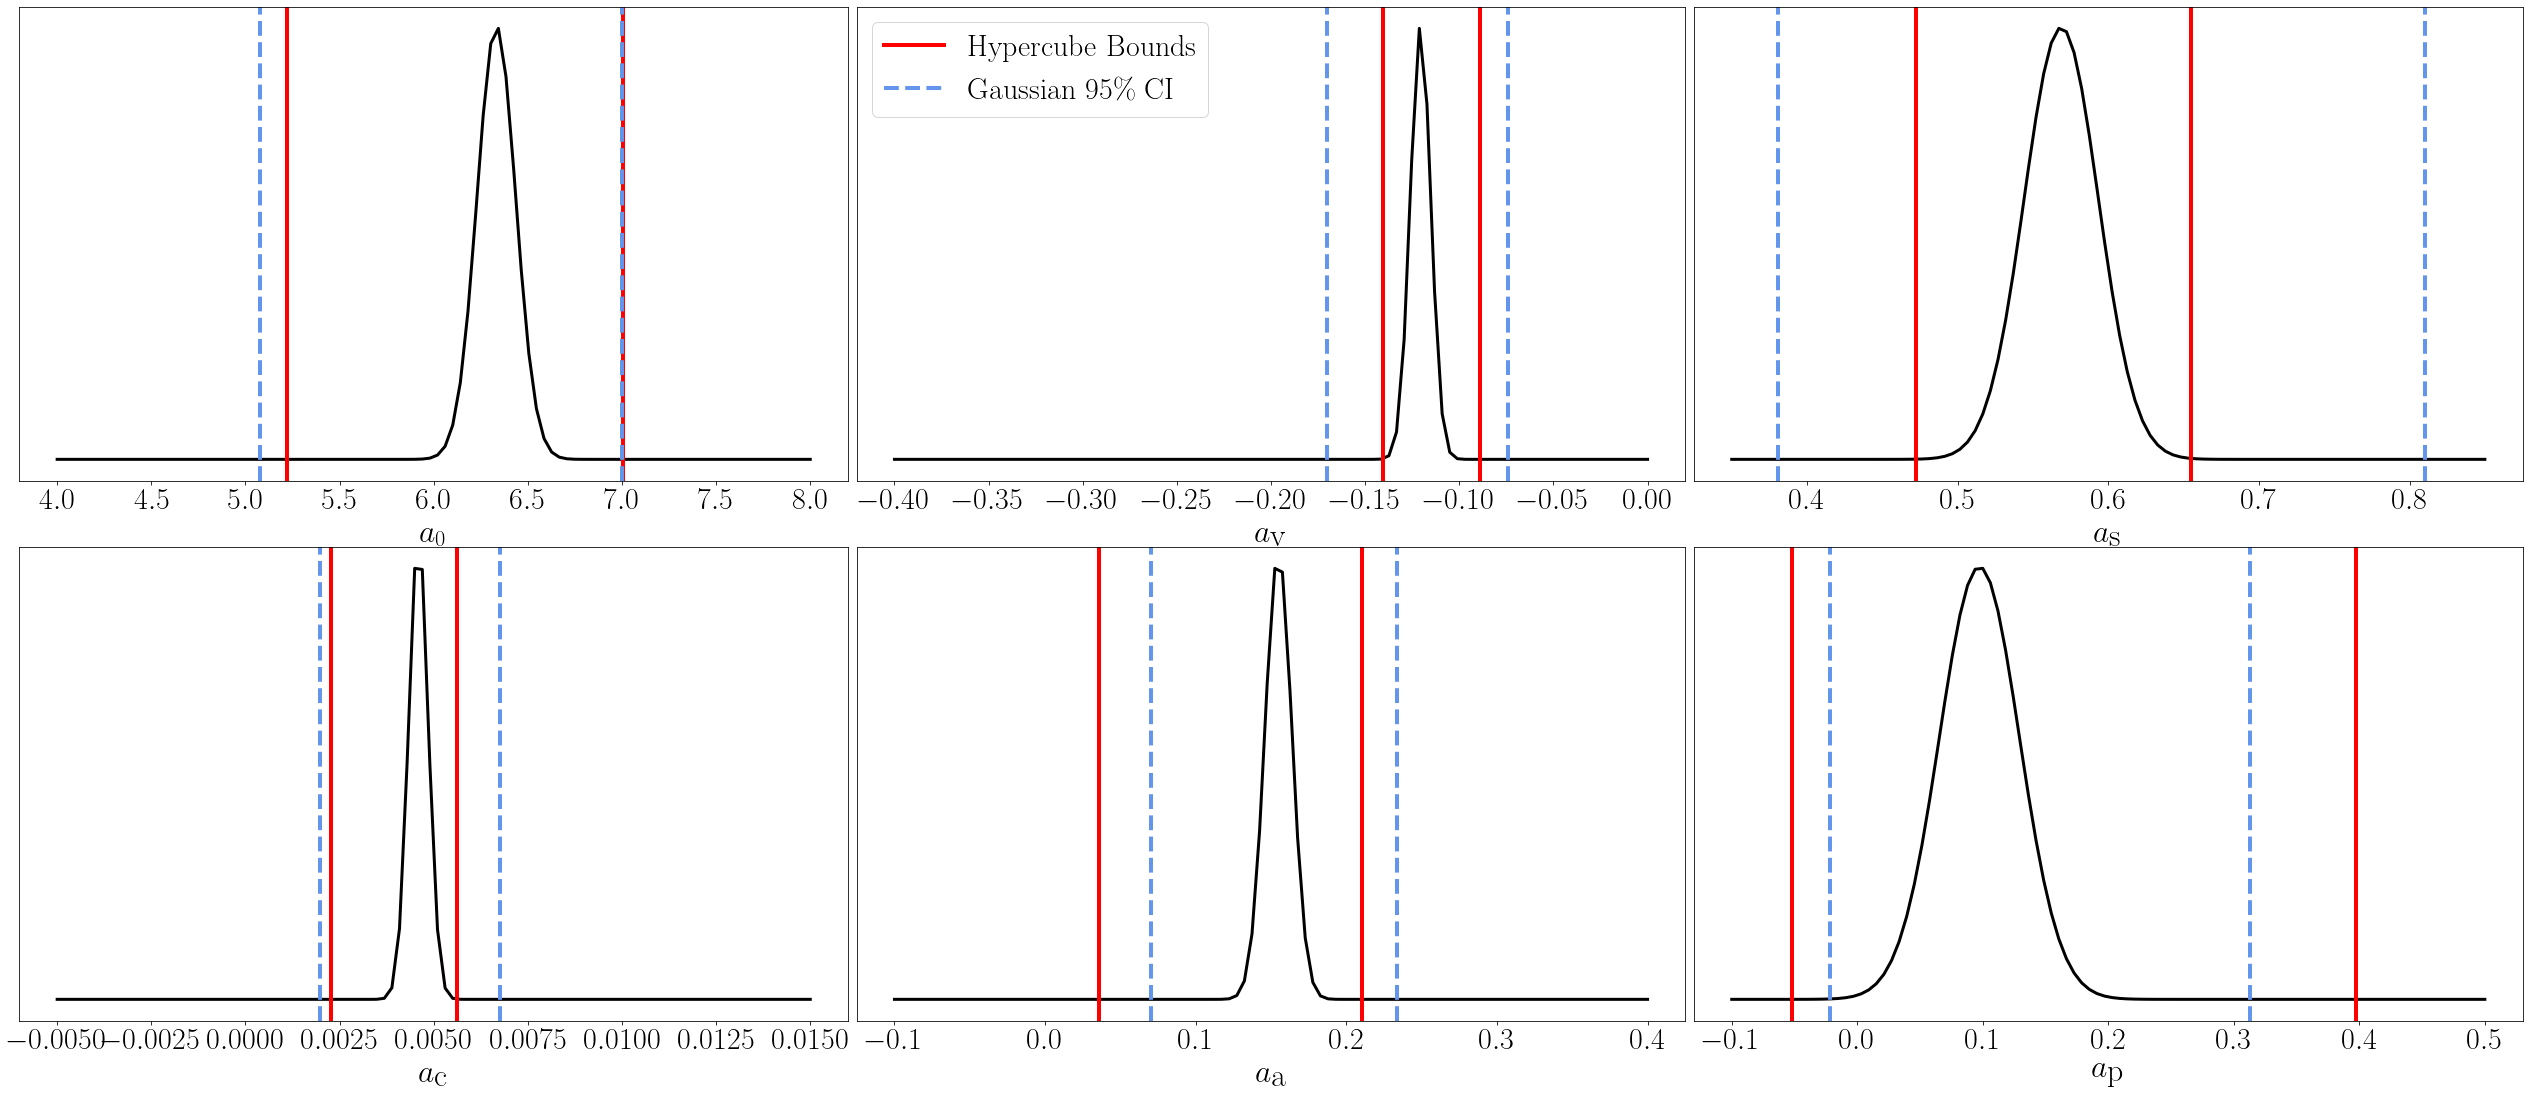

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(35,15))

nonimplausible_HC = utils.locate_boundaries(NI_3D_4_HC_noem, ndim)

mean_EL = np.mean(NI_3D_5[:,:-1].T, axis=1)
cov_EL = np.cov(NI_3D_5[:,:-1].T)

for i in range(ndim):
    if i < 3:
        j = 0
        k = i
    else:
        j = 1
        k = i - 3
        
    
    axes[j,k].plot(theta_vals[i], stats.norm.pdf(theta_vals[i], analytic_mean[i], np.sqrt(analytic_cov[i,i])), color='black', linewidth=3)
    axes[j,k].axvline(nonimplausible_HC[i,0], color='red', linewidth=4, label = r'Hypercube Bounds'.format(95))
    axes[j,k].axvline(nonimplausible_HC[i,1], color='red', linewidth=4)
    
    
    # plot 95% gaussian
    #axes[j,k].axvline(mean_EL[i]-((2)*np.sqrt(cov_EL[i,i])), color='royalblue', linewidth=3, linestyle='--', label = r'Gaussian {}% Confidence'.format(95))
    #axes[j,k].axvline(mean_EL[i]+((2)*np.sqrt(cov_EL[i,i])), color='royalblue', linewidth=3, linestyle='--')
    
    confidence_interval = stats.norm.interval(alpha=0.95, loc=mean_EL[i], scale=np.sqrt(cov_EL[i,i]))
    axes[j,k].axvline(confidence_interval[0], color='cornflowerblue', linewidth=4, linestyle='--', label = r'Gaussian 95\% CI')
    axes[j,k].axvline(confidence_interval[1], color='cornflowerblue', linewidth=4, linestyle='--')
    
    axes[j,k].axes.get_yaxis().set_visible(False)
    axes[j,k].set_xlabel(theta_names[i])

axes[0,1].legend(loc='best')
plt.tight_layout(pad=0.0)
#plt.savefig('figures/HC_GA_comparison.png', bbox_inches='tight', facecolor='white', transparent=False)

implaus2D
implaus2D
implaus2D


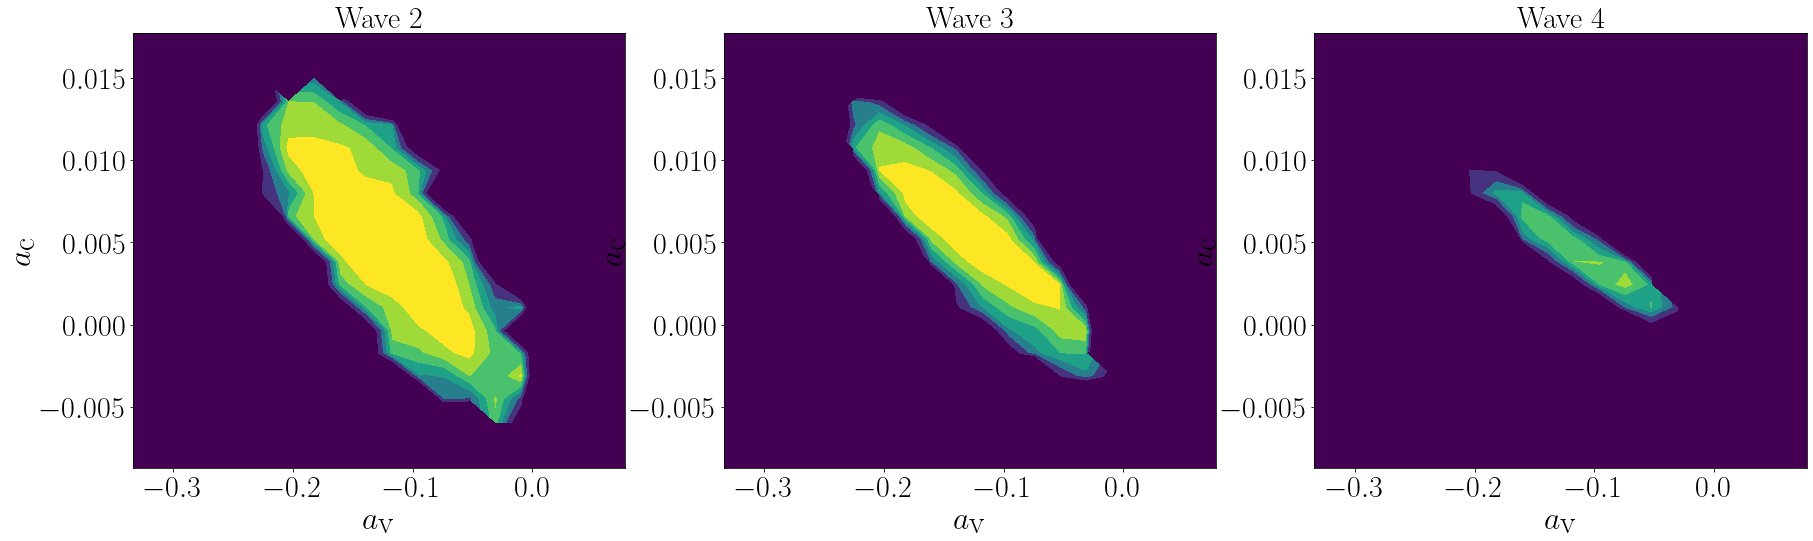

In [34]:
fig, axes = plt.subplots(1,3,figsize=(30,8))

#axes[0].scatter(S_EL[0][:,1],S_EL[0][:,1])
for i in range(3):
    plot.plot_implausibility2D(S_EL[i+1], np.concatenate((lims[1].reshape(-1,1),lims[3].reshape(-1,1)),axis=1).T, [1,3],\
                               labels=theta_names, bins=20, Fig=(fig,axes[i]),colorbar=False)
    #true_cov = np.array([[analytic_cov[1,1], analytic_cov[1,3]],[analytic_cov[3,1], analytic_cov[3,3]]])

    #plot.get_cov_ellipse(true_cov, [analytic_mean[1],analytic_mean[3]], 3, 5.991, axes[i], 'black')
    
axes[0].set_title('Wave 2')
axes[1].set_title('Wave 3')
axes[2].set_title('Wave 4')
plt.savefig('figures/gaussian_waves.png', bbox_inches='tight', facecolor='white', transparent=False)

In [ ]:
def volume_ellipse(chi, cov, n):
    
    # find axes lengths
    eigvals, eigvecs = np.linalg.eigh(cov)
    idx = np.sum(cov).argsort()
    eigvals_temp = eigvals[idx]
    idx = eigvals_temp.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]

    # Set of all spherical angles to draw our ellipsoid
    n_points = 100
    theta = np.linspace(0, 2*np.pi, n_points)
    phi = np.linspace(0, np.pi, n_points)

    # Width, height and depth of ellipsoid
    #axes = np.sqrt(12.838) * np.sqrt(eigvals) # 99.5
    axes = np.sqrt(chi) * np.sqrt(eigvals) # 95

    
    vol = 2*np.prod(axes)*(np.pi**(n/2)) / (n*math.factorial(n-1))
    
    
    return vol

In [ ]:
nsamples_el = S_3D_5.shape[0]

for i in range(nwaves):
    vol_ratio = 100*volume_ellipse(12.592, np.cov(NI[i][:,:-1].T), 6)/initial_volume
    print('Gaussian volume (emulator) : ' + str(vol_ratio) + '%')
    print(volume_ellipse(12.592, np.cov(NI[i][:,:-1].T), 6))
    print('Nonimplausible samples : ' + str(100*NI[i].shape[0]/nsamples_el) + '%') 

In [ ]:

nsamples_hc = S_3D_5_HC_noem.shape[0]

for i in range(len(NIHC_noem)):
    HCbounds = utils.locate_boundaries(NIHC_noem[i], ndim)
    volume_hc = 1
    for j in range(ndim):
        volume_hc *= np.abs(HCbounds[j,1]-HCbounds[j,0])
    vol_ratio = 100*volume_hc/initial_volume
    print('Hypercube volume (no emulator): ' + str(vol_ratio) + '%')
    print(NIHC_noem[i].shape[0])
    print('Nonimplausible samples : ' + str(100*NIHC_noem[i].shape[0]/nsamples_hc) + '%') 

